In [ ]:
# pip install wordcloud


In [ ]:
# pip install Pillow

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from os import path
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
stopwords.add('will')

df = pd.read_csv('../../resources/Wordcloud_Data_Set_MBJ.csv')

In [10]:
df

,Unnamed: 0,author,total_followers,total_following,number_posts,shortcode,timestamp,Date,time,likes,...,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8,Tag_9,Tag_10,Tag_11
0,0,shmee150,1581500,2857,10552,CSzoxcyrzj2,1629485286,44428.78340,44428.78340,19080,...,SF90,futureshmeemobile,AssettoFiorano,BannedAuto,LAcars,Shmee150,NaN,NaN,NaN,NaN
1,1,shmee150,1581500,2857,10552,CSr2jQPjy59,1629224075,44425.76013,44425.76013,22143,...,P1,McLarenP1,testdrive,CarWeek,Shmee150,NaN,NaN,NaN,NaN,NaN
2,2,shmee150,1581500,2857,10552,CSpWzdxJIIV,1629140321,44424.79075,44424.79075,21606,...,300SL,PebbleBeach,CarWeek,testdrive,Shmee150,NaN,NaN,NaN,NaN,NaN
3,3,shmee150,1581500,2857,10552,CSkdxyJAk2n,1628976206,44422.89127,44422.89127,30069,...,Bolide,Quail,CarWeek,Shmee150,NaN,NaN,NaN,NaN,NaN,NaN
4,4,shmee150,1581500,2857,10552,CSfHSEzi3BD,1628796639,44420.81295,44420.81295,34073,...,Valkyrie,ValkyrieSpider,firstlook,PebbleBeach,CarWeek,Shmee150,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,343,simeonpanda,7872317,187,7465,CSZ8acRJ4jt,1628623169,44418.80520,44418.80520,78662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,344,simeonpanda,7872317,187,7465,CSZZfp2Hs0r,1628604861,44418.59330,44418.59330,26263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,345,simeonpanda,7872317,187,7465,CSYTSCEgCC7,1628568165,44418.16858,44418.16858,23835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,346,simeonpanda,7872317,187,7465,CSW4jvynJ3N,1628520524,44417.61718,44417.61718,33932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# df["combined"] = df["text"]
# df.head()

In [12]:
df.describe()

,Unnamed: 0,total_followers,total_following,number_posts,timestamp,Date,time,likes,comments,engagement,average_engagement
count,348.000000,3.480000e+02,348.000000,348.000000,3.480000e+02,348.000000,348.000000,3.480000e+02,348.000000,348.000000,348.000000
mean,173.500000,7.778966e+06,919.068966,4108.551724,1.625196e+09,44379.142755,44379.142755,1.493575e+05,2266.301724,2.829171,2.829171
std,100.603181,1.018085e+07,1169.458130,3610.262228,1.089077e+07,126.050549,126.050549,2.692371e+05,10317.720319,3.403084,3.041209
min,0.000000,1.619050e+05,51.000000,103.000000,1.528915e+09,43264.780200,43264.780200,4.160000e+02,0.000000,0.037402,0.118690
25%,86.750000,1.451774e+06,263.000000,1411.000000,1.626387e+09,44392.921695,44392.921695,1.724350e+04,113.750000,0.536250,0.740933
50%,173.500000,4.353599e+06,419.000000,2802.000000,1.628621e+09,44418.776165,44418.776165,4.466450e+04,337.000000,1.549691,1.594023
75%,260.250000,9.086425e+06,1087.000000,6566.000000,1.629257e+09,44426.137443,44426.137443,1.493490e+05,1048.000000,3.799634,3.787746
max,347.000000,4.919355e+07,5615.000000,14939.000000,1.629583e+09,44429.911860,44429.911860,2.292809e+06,135652.000000,19.443501,14.089487


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          348 non-null    int64  
 1   author              348 non-null    object 
 2   total_followers     348 non-null    int64  
 3   total_following     348 non-null    int64  
 4   number_posts        348 non-null    int64  
 5   shortcode           348 non-null    object 
 6   timestamp           348 non-null    int64  
 7   Date                348 non-null    float64
 8   time                348 non-null    float64
 9   likes               348 non-null    int64  
 10  comments            348 non-null    int64  
 11  engagement          348 non-null    float64
 12  average_engagement  348 non-null    float64
 13  caption             246 non-null    object 
 14  text                338 non-null    object 
 15  Tag_1               58 non-null     object 
 16  Tag_2   

In [6]:
# df['text']=df['text'].str.replace('[^a-zA-Z0-9]', '').str.lower()
# df

,Unnamed: 0,author,total_followers,total_following,number_posts,shortcode,timestamp,Date,time,likes,...,Tag_2,Tag_3,Tag_4,Tag_5,Tag_6,Tag_7,Tag_8,Tag_9,Tag_10,Tag_11
0,0,shmee150,1581500,2857,10552,CSzoxcyrzj2,1629485286,44428.78340,44428.78340,19080,...,SF90,futureshmeemobile,AssettoFiorano,BannedAuto,LAcars,Shmee150,NaN,NaN,NaN,NaN
1,1,shmee150,1581500,2857,10552,CSr2jQPjy59,1629224075,44425.76013,44425.76013,22143,...,P1,McLarenP1,testdrive,CarWeek,Shmee150,NaN,NaN,NaN,NaN,NaN
2,2,shmee150,1581500,2857,10552,CSpWzdxJIIV,1629140321,44424.79075,44424.79075,21606,...,300SL,PebbleBeach,CarWeek,testdrive,Shmee150,NaN,NaN,NaN,NaN,NaN
3,3,shmee150,1581500,2857,10552,CSkdxyJAk2n,1628976206,44422.89127,44422.89127,30069,...,Bolide,Quail,CarWeek,Shmee150,NaN,NaN,NaN,NaN,NaN,NaN
4,4,shmee150,1581500,2857,10552,CSfHSEzi3BD,1628796639,44420.81295,44420.81295,34073,...,Valkyrie,ValkyrieSpider,firstlook,PebbleBeach,CarWeek,Shmee150,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,343,simeonpanda,7872317,187,7465,CSZ8acRJ4jt,1628623169,44418.80520,44418.80520,78662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,344,simeonpanda,7872317,187,7465,CSZZfp2Hs0r,1628604861,44418.59330,44418.59330,26263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,345,simeonpanda,7872317,187,7465,CSYTSCEgCC7,1628568165,44418.16858,44418.16858,23835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,346,simeonpanda,7872317,187,7465,CSW4jvynJ3N,1628520524,44417.61718,44417.61718,33932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# let's us know what people in this data set are talking about
def WordCloudPlotter(dfColumn):
    colData = df[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 
    

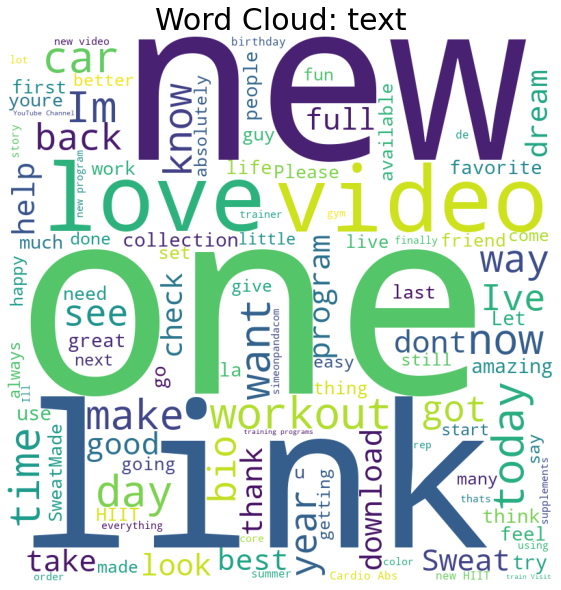

In [25]:
wc = WordCloudPlotter('text')
wc

TypeError: Image data of dtype object cannot be converted to float

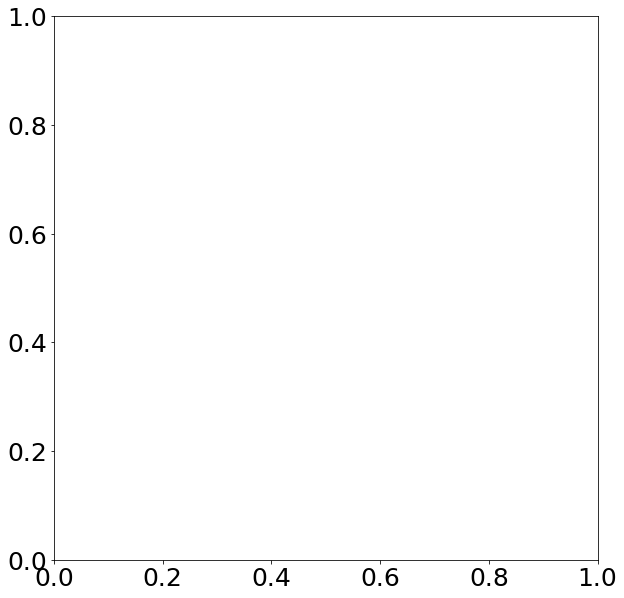

In [34]:

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")